In [1]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
import seaborn as sns

In [2]:
years = 20
rate = 0.05  # mean annual rate, e.g. VT ETF
dip_fee = 0  # DIP annual fee
contrib_emp = 20_400  # employee contributions, max 48000
contrib_comp = 0  # employer contributions, max 50000
contrib = contrib_emp + contrib_comp
tax_rate = 0.15  # income tax rate
socsec_rate = 0.15  # social+healthcare tax rate (employee)
dip_tax_saving = contrib_emp * tax_rate + contrib_comp * (tax_rate + socsec_rate)
dps_state_contrib = 340 * 12
contrib_for_max_state_support = 1700
dps_tax_saving = (contrib_emp - 12 * contrib_for_max_state_support) * tax_rate + contrib_comp * (tax_rate + socsec_rate)
etf_ter = 0.001

In [3]:
res = defaultdict(list)
init = 548_000
state_contribution = 13_000
dps_cancel_fees = (init - state_contribution) * 0.2 + state_contribution  # taxation of previous tax reliefs, empolyer contributions, and RoI + return of the state contributions
dip = init - dps_cancel_fees
fees = 0
etf_dip_tax = 0
fees_etf_dip_tax = 0
etf_dps_tax = 0
fees_etf_dps_tax = 0
etf = init - dps_cancel_fees  # benchmark
etf_fees = 0
dps = init # doplnkove penzijni sporeni, benchmark
dps_fees = 0

for year in range(1, years + 1):
    dip = (dip + contrib) * (1 + rate)
    fee = dip * (dip_fee + etf_ter)
    dip -= fee
    fees += fee
    res["dip"].append(dip)
    res["fees"].append(fees)

    etf_dip_tax = (etf_dip_tax + dip_tax_saving) * (1 + rate)
    fee = etf_dip_tax * etf_ter
    etf_dip_tax -= fee
    fees_etf_dip_tax += fee
    res["etf_dip_tax"].append(etf_dip_tax)
    res["fees_etf_dip_tax"].append(fees_etf_dip_tax)
    
    etf = (etf + contrib) * (1 + rate)
    fee = etf * etf_ter
    etf_fees += fee
    etf -= fee
    res["etf"].append(etf)
    res["etf_fees"].append(etf_fees)
    
    dps_gain = (dps + contrib + dps_state_contrib) * rate
    dps += dps_gain + contrib + dps_state_contrib
    fee = dps * 0.0075 + dps_gain * 0.015
    dps -= fee
    dps_fees += fee
    res["dps"].append(dps)
    res["dps_fees"].append(dps_fees)

    etf_dps_tax = (etf_dps_tax + dps_tax_saving) * (1 + rate)
    fee = etf_dps_tax * etf_ter
    etf_dps_tax -= fee
    fees_etf_dps_tax += fee
    res["etf_dps_tax"].append(etf_dps_tax)
    res["fees_etf_dps_tax"].append(fees_etf_dps_tax)

res = pd.DataFrame(res)
res["dps_reinvest"] = res.dps + res.etf_dps_tax
res["dps_reinvest_fees"] = res.dps_fees + res.fees_etf_dps_tax
res["dip_reinvest"] = res.dip + res.etf_dip_tax
res["dip_reinvest_fees"] = res.fees + res.fees_etf_dip_tax
res

,dip,fees,etf_dip_tax,fees_etf_dip_tax,etf,etf_fees,dps,dps_fees,etf_dps_tax,fees_etf_dps_tax,dps_reinvest,dps_reinvest_fees,dip_reinvest,dip_reinvest_fees
0,4.703492e+05,470.820000,3209.787000,3.213000,4.703492e+05,470.820000,5.961664e+05,4937.640000,0.0,0.0,5.961664e+05,4937.640000,4.735590e+05,474.033000
1,5.147714e+05,986.106639,6576.693074,9.796276,5.147714e+05,986.106639,6.463256e+05,10290.714855,0.0,0.0,6.463256e+05,10290.714855,5.213480e+05,995.902915
2,5.613680e+05,1548.036559,10108.409200,19.914804,5.613680e+05,1548.036559,6.985602e+05,16076.413182,0.0,0.0,6.985602e+05,16076.413182,5.714764e+05,1567.951363
3,6.102455e+05,2158.892949,13813.002830,33.741634,6.102455e+05,2158.892949,7.529560e+05,22312.634778,0.0,0.0,7.529560e+05,22312.634778,6.240585e+05,2192.634582
4,6.615156e+05,2821.070758,17698.936318,51.458287,6.615156e+05,2821.070758,8.096024e+05,29018.020041,0.0,0.0,8.096024e+05,29018.020041,6.792146e+05,2872.529045
5,7.152954e+05,3537.082172,21775.086251,73.255170,7.152954e+05,3537.082172,8.685925e+05,36211.980621,0.0,0.0,8.685925e+05,36211.980621,7.370705e+05,3610.337342
6,7.717077e+05,4309.562344,26050.763723,99.332010,7.717077e+05,4309.562344,9.300234e+05,43914.731319,0.0,0.0,9.300234e+05,43914.731319,7.977585e+05,4408.894355
7,8.308814e+05,5141.275421,30535.735607,129.898312,8.308814e+05,5141.275421,9.939960e+05,52147.323327,0.0,0.0,9.939960e+05,52147.323327,8.614171e+05,5271.173733
8,8.929516e+05,6035.120853,35240.246865,165.173835,8.929516e+05,6035.120853,1.060615e+06,60931.678830,0.0,0.0,1.060615e+06,60931.678830,9.281918e+05,6200.294688
9,9.580601e+05,6994.140019,40175.043950,205.389094,9.580601e+05,6994.140019,1.129991e+06,70290.627041,0.0,0.0,1.129991e+06,70290.627041,9.982352e+05,7199.529113


<Axes: >

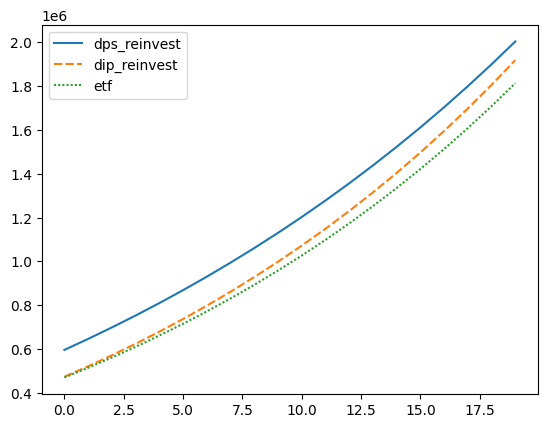

In [4]:
sns.lineplot(res[["dps_reinvest", "dip_reinvest", "etf"]])

<Axes: >

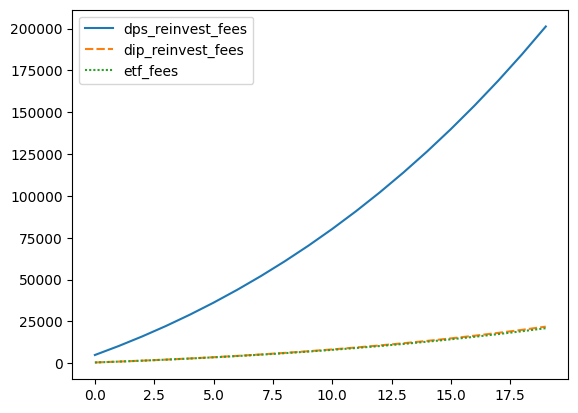

In [5]:
sns.lineplot(res[["dps_reinvest_fees", "dip_reinvest_fees", "etf_fees"]])

In [6]:
pd.options.display.max_colwidth = 200
res[["etf", "dps_reinvest", "dip_reinvest"]].tail(1)

,etf,dps_reinvest,dip_reinvest
19,1.812877e+06,2.002938e+06,1.917841e+06


In [7]:
res[["etf_fees", "dps_reinvest_fees", "dip_reinvest_fees"]].tail(1)

,etf_fees,dps_reinvest_fees,dip_reinvest_fees
19,20954.458531,201233.685454,21893.226852
